# Text Summarization & Visualization

## Setup
To prepare your environment, you need to install some packages.

### Install the necessary packages

You need the latest versions of these packages:<br>

In [1]:
!pip install gensim

    100% |████████████████████████████████| 23.6MB 40kB/s  eta 0:00:01
Requirement not upgraded as not directly required: numpy>=1.11.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: scipy>=0.18.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: six>=1.5.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from gensim)
Requirement not upgraded as not directly required: boto>=2.32 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from smart-open>=1.2.1->gensim)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from smart-open>=1.2.1->gensim)
Requirement not upgraded as not directly required: boto3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from smart-open>=1.2.1->gensim)
Requirement not upgraded as not directly required: charde

In [2]:
!pip install watson-developer-cloud==1.5

    100% |████████████████████████████████| 225kB 4.0MB/s eta 0:00:01
Requirement not upgraded as not directly required: requests<3.0,>=2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: python_dateutil>=2.5.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
    100% |████████████████████████████████| 307kB 3.1MB/s eta 0:00:01
    100% |████████████████████████████████| 3.1MB 318kB/s eta 0:00:01
Requirement not upgraded as not directly required: pyOpenSSL>=16.2.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests<3.0,>=2.0->watson-developer-cloud==1.5)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/lib/py

In [3]:
!pip install pyldavis

    100% |████████████████████████████████| 1.6MB 591kB/s eta 0:00:01
Requirement not upgraded as not directly required: wheel>=0.23.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: numpy>=1.9.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: scipy>=0.18.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: pandas>=0.17.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
    100% |████████████████████████████████| 276kB 3.7MB/s eta 0:00:01
Requirement not upgraded as not directly required: jinja2>=2.7.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgraded as not directly required: numexpr in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pyldavis)
Requirement not upgr

In [4]:
!pip install wordcloud

    100% |████████████████████████████████| 358kB 2.6MB/s eta 0:00:01
Requirement not upgraded as not directly required: pillow in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: numpy>=1.6.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from wordcloud)
Requirement not upgraded as not directly required: olefile in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pillow->wordcloud)


In [5]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
import watson_developer_cloud
import ibm_boto3
from botocore.client import Config
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /home/ds

True

## 1. Summarization & keywords extraction

### 1a. Read the Data
Click on Insert to code and then select Insert Credentials as credentials_1

### 1b. Functions to extract files from Cloud Object Storage

In [7]:
cos = ibm_boto3.client('s3',
                    ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                    ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                    ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                    config=Config(signature_version='oauth'),
                    endpoint_url=credentials_1['ENDPOINT'])

def get_file(filename):
    '''Retrieve file from Cloud Object Storage'''
    fileobject = cos.get_object(Bucket=credentials_1['BUCKET'], Key=filename)['Body']
    return fileobject

def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    return text

### 1c. Get File Contents

In [8]:
text=str(load_string(get_file("Mission_Impossible_6_Review.txt")))

### 1d. Helper functions to extract summary and keywords

In [9]:
'''Get the summary of the text'''

def get_summary(text, pct):
    summary = summarize(text,ratio=pct,split=True)
    return summary

'''Get the keywords of the text'''

def get_keywords(text):
    res = keywords(text, ratio=0.1, words=None, split=False, scores=False, pos_filter=('NN', 'JJ'), lemmatize=False, deacc=False)
    res = res.split('\n')
    return res

'''Tokenize the sentence into words & remove punctuation'''

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def split_sentences(text):
    """ Split text into sentences.
    """
    sentence_delimiters = re.compile(u'[\\[\\]\n.!?]')
    sentences = sentence_delimiters.split(text)
    return sentences

def split_into_tokens(text):
    """ Split text into tokens.
    """
    tokens = nltk.word_tokenize(text)
    return tokens
    
def POS_tagging(text):
    """ Generate Part of speech tagging of the text.
    """
    POSofText = nltk.tag.pos_tag(text)
    return POSofText

def extract_title_text(url):
    page = urllib.request.urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(page,'lxml')
    text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
    return soup.title.text, text

In [10]:
print('Printing Summary')
print('--------------------------')
print(get_summary(text, 0.3))
print ('-------------------------')
print('Printing Keywords')
print('--------------------------')
print(get_keywords(text))

Printing Summary
--------------------------
['b"Before its release, Mission: Impossible Fallout has been known for two things: the fact that it\'s the first direct sequel in the series and THAT injury to Tom Cruise.Let\'s get the injury out of the way first.', "The shot is in the movie and it will make you wince because you know the context, but otherwise you don't really notice any difference as the stunt in question is just the latest in a long line of deathdefying activities featuring Cruise.What makes more of an impact on the sixth movie in the series is its connection to the previous movie, Rogue Nation, with the return of the villainous Solomon Lane (played creepily again by Sean Harris) and his nefarious Syndicate, who are again threatening the world.With the addition of Ethan Hunt's former wife Julia (Michelle Monaghan) from the third movie, Fallout is immediately given more depth than previous outings and the stakes feel higher, with Ethan Hunt (Cruise) haunted by his past mis

## 2. Visualization

### 2a. Remove punctuation & special characters

In [11]:
import re
my_new_text = re.sub('[^ a-zA-Z0-9]', '', text)

### 2b. Preprocess the text for next steps

In [12]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(my_new_text)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

### 2c. Create n grams where n is the number of words

In [13]:
from nltk import ngrams
n = 7
total_grams = []
number_of_grams = ngrams(normalized.split(), n)
for grams in number_of_grams:
    total_grams.append(grams)

In [14]:
print(total_grams[:10])

[('bBefore', 'release', 'Mission', 'Impossible', 'Fallout', 'known', 'two'), ('release', 'Mission', 'Impossible', 'Fallout', 'known', 'two', 'thing'), ('Mission', 'Impossible', 'Fallout', 'known', 'two', 'thing', 'fact'), ('Impossible', 'Fallout', 'known', 'two', 'thing', 'fact', 'first'), ('Fallout', 'known', 'two', 'thing', 'fact', 'first', 'direct'), ('known', 'two', 'thing', 'fact', 'first', 'direct', 'sequel'), ('two', 'thing', 'fact', 'first', 'direct', 'sequel', 'series'), ('thing', 'fact', 'first', 'direct', 'sequel', 'series', 'THAT'), ('fact', 'first', 'direct', 'sequel', 'series', 'THAT', 'injury'), ('first', 'direct', 'sequel', 'series', 'THAT', 'injury', 'Tom')]


### 2d. Create the wordcloud visualization on the processed data
To highlight important textual data points & convey crucial information. The more a specific word appears in a source of textual data, the bigger and bolder it appears in the word cloud.

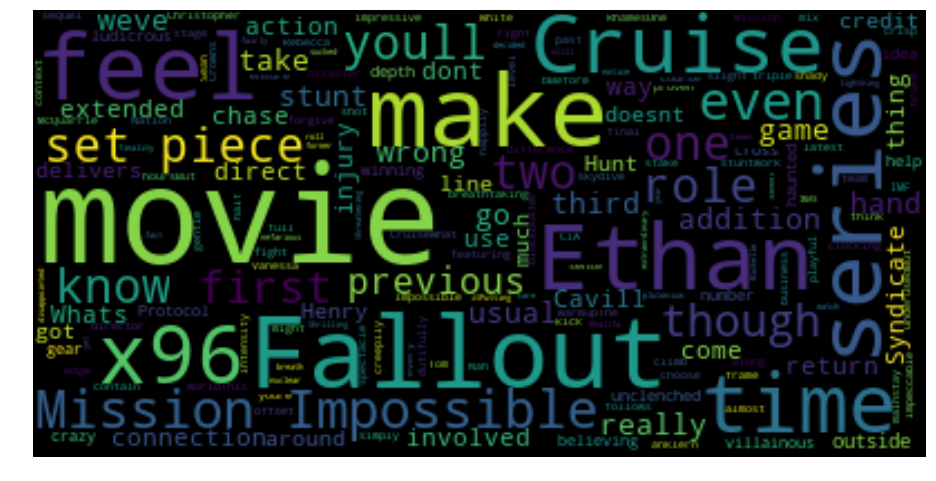

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2e. Analyze the frequency of words in the text. 

In [16]:
count = {}
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1
for word, times in count.items():
    if times > 3:
        print("%s was found %d times" % (word, times))

movie was found 12 times
Mission was found 4 times
Impossible was found 4 times
Fallout was found 6 times
time was found 4 times
series was found 5 times
even was found 4 times
make was found 6 times
Ethan was found 4 times
Cruise was found 4 times
feel was found 5 times
x96 was found 4 times
get was found 4 times


### 2f. Create a Dispersion plot
The motivation behind using the Lexical Dispersion Plots was to give us an alternative means of visualising how prevalent  these words are in the text corpus, whether or not there was a clustering pattern that is whether or not a word featured heavily at certain point of the text corpus.

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


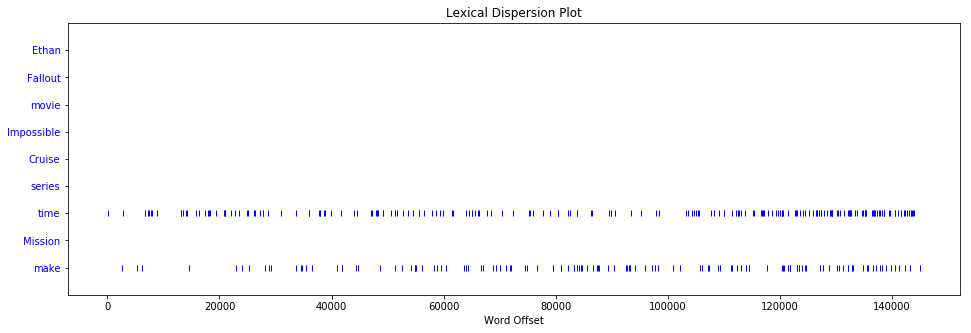

In [17]:
from nltk.book import text4 as content
plt.figure(figsize=(16,5))
topics = ['Ethan', 'Fallout','movie', 'Impossible', 'Cruise', 'series', 'time', 'Mission', 'make']
content.dispersion_plot(topics)

## 3. Topic Modelling

### 3a. Start the preprocessing for Topic Modelling

Topic Modelling is an approach for finding topics in large amounts of text. Topic modeling is great for document clustering, information retrieval from unstructured text, and feature selection.
 
Topic Modeling with Latent Dirichlet Allocation technique.

Why Latent Dirichlet Allocation? This technique can create model which can be generalized easily on any new text corpus and help us in identifying the important topics from the corpus. 

Some of the advantages are :

Training documents may come in sequentially, no random access required.

Runs in constant memory w.r.t. the number of documents: size of the training corpus does not affect memory footprint, can process corpora larger than RAM.

Is distributed & makes use of a cluster of machines, if available, to speed up model estimation.

In [18]:
import gensim
from gensim import corpora

tokenized_sents = list(sent_to_words(filtered_sentence))

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tokenized_sents)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]

### 3b. Creating the object for LDA model & train the model

In [19]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix by selecting minimum parameters required.
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=100)

### 3c. Extract two topics with twenty words in each topic

In [20]:
print(ldamodel.print_topics(num_topics=2, num_words=20))

[(0, '0.014*"series" + 0.014*"mission" + 0.014*"impossible" + 0.011*"even" + 0.011*"ethan" + 0.011*"makes" + 0.009*"two" + 0.009*"previous" + 0.009*"one" + 0.009*"though" + 0.009*"like" + 0.009*"set" + 0.009*"movies" + 0.006*"times" + 0.006*"henry" + 0.006*"wrong" + 0.006*"go" + 0.006*"got" + 0.006*"make" + 0.006*"knows"'), (1, '0.025*"movie" + 0.017*"fallout" + 0.012*"get" + 0.012*"feel" + 0.012*"theres" + 0.012*"cruise" + 0.009*"role" + 0.009*"first" + 0.009*"youll" + 0.006*"syndicate" + 0.006*"games" + 0.006*"its" + 0.006*"come" + 0.006*"usual" + 0.006*"pieces" + 0.006*"extended" + 0.006*"cavill" + 0.006*"weve" + 0.006*"connection" + 0.006*"outside"')]


### 3d. Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 

In [21]:
'''Compute Perplexity'''

# a measure of how good the model is. lower the better.

print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.64298369709

Coherence Score:  0.862222937851


#### Coherence score is 'higher the better' metric and given the score of 0.86 we can be assured that we have selected the right number of topics for this corpus.

In [22]:
'''Visualize the topics'''
# pyLDAvis tool to visualize the fit of our LDA model across topics and their top words. 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
0      50.935871        1       1  0.084208  0.0
1      49.064133        1       2 -0.084208  0.0, topic_info=     Category      Freq          Term     Total  loglift  logprob
term                                                             
8     Default  5.000000         movie  5.000000  30.0000  30.0000
177   Default  3.000000       fallout  3.000000  29.0000  29.0000
173   Default  3.000000        series  3.000000  28.0000  28.0000
180   Default  3.000000    impossible  3.000000  27.0000  27.0000
297   Default  3.000000       mission  3.000000  26.0000  26.0000
317   Default  2.000000           get  2.000000  25.0000  25.0000
0     Default  2.000000        theres  2.000000  24.0000  24.0000
278   Default  2.000000          feel  2.000000  23.0000  23.0000
81    Default  2.000000        cruise  2.000000  22.0000  22.0000
223   Default  2.000000          even  2.000000  21.0000  21.0000
123   Default  2.000000         ethan  2.000000  20.0000  20.0000
118   Default  2.000000         makes  2.000000  19.0000  19.0000
313   Default  2.000000         first  2.000000  18.0000  18.0000
302   Default  2.000000          role  2.000000  17.0000  17.0000
25    Default  2.000000         youll  2.000000  16.0000  16.0000
96    Default  2.000000           one  2.000000  15.0000  15.0000
4     Default  2.000000           two  2.000000  14.0000  14.0000
252   Default  2.000000        though  2.000000  13.0000  13.0000
233   Default  2.000000           set  2.000000  12.0000  12.0000
112   Default  2.000000      previous  2.000000  11.0000  11.0000
125   Default  2.000000          like  2.000000  10.0000  10.0000
244   Default  2.000000        movies  2.000000   9.0000   9.0000
174   Default  1.000000           way  1.000000   8.0000   8.0000
70    Default  1.000000           its  1.000000   7.0000   7.0000
50    Default  1.000000         usual  1.000000   6.0000   6.0000
47    Default  1.000000         whats  1.000000   5.0000   5.0000
245   Default  1.000000        injury  1.000000   4.0000   4.0000
100   Default  1.000000    connection  1.000000   3.0000   3.0000
217   Default  1.000000        pieces  1.000000   2.0000   2.0000
131   Default  1.000000      extended  1.000000   1.0000   1.0000
...       ...       ...           ...       ...      ...      ...
171    Topic2  1.406399           the  1.700653   0.5221  -5.0382
217    Topic2  1.406399        pieces  1.700653   0.5221  -5.0382
119    Topic2  1.406399          come  1.700653   0.5221  -5.0382
70     Topic2  1.406399           its  1.700653   0.5221  -5.0382
290    Topic2  1.406399          line  1.700653   0.5221  -5.0382
174    Topic2  1.406399           way  1.700653   0.5221  -5.0382
52     Topic2  1.406399         stunt  1.700653   0.5221  -5.0382
50     Topic2  1.406399         usual  1.700653   0.5221  -5.0382
204    Topic2  1.406399     syndicate  1.700653   0.5221  -5.0382
47     Topic2  1.406399         whats  1.700653   0.5221  -5.0382
43     Topic2  1.406399          weve  1.700653   0.5221  -5.0382
203    Topic2  1.406399        cavill  1.700653   0.5221  -5.0382
116    Topic2  1.406399         games  1.700653   0.5221  -5.0382
270    Topic2  0.838526      downside  1.133280   0.4108  -5.5554
94     Topic2  0.838526     dutifully  1.133280   0.4108  -5.5554
51     Topic2  0.838526           cia  1.133280   0.4108  -5.5554
154    Topic2  0.838526        notice  1.133280   0.4108  -5.5554
159    Topic2  0.838526         where  1.133280   0.4108  -5.5554
181    Topic2  0.838526        walker  1.133280   0.4108  -5.5554
179    Topic2  0.838526         kinds  1.133280   0.4108  -5.5554
258    Topic2  0.838526         still  1.133280   0.4108  -5.5554
16     Topic2  0.838526     ludicrous  1.133280   0.4108  -5.5554
13     Topic2  0.838526        number  1.133280   0.4108  -5.5554
221    Topic2  0.838526         kicks  1.133280   0.4108  -5.5554

#### We can observe that our LDA model has captured the prominent keywords under two topics in the text corpus which will give us a good understanding of what the text corpus is about. We can do further analysis by using this information to generate recommendations & classify the text for user profiling or push notifications. 

## In the next section, we will see how we can summarize and visualize news article!

### 1. Summarization & keywords extraction

In [23]:
'''Extract the first article of the news feed'''

url = urllib.request.urlopen('http://feeds.bbci.co.uk/news/rss.xml').read()
feed = BeautifulSoup(url.decode('utf8'),'lxml')
urls_to_summarize = list(map(lambda p: p.text, feed.find_all('guid')))
for article_url in urls_to_summarize[:1]:
    title, text = extract_title_text(article_url)
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing title & text')
    print('-----------------------')
    print (title, text)
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing title & summary')
    print('--------------------------')
    print (title)
    for s in get_summary(text, 0.2):
        print((s))
    print ('-------------------------------------------------------------------------------------------------------------------')
    print('Printing Keywords')
    print('--------------------------')
    for i in get_keywords(text):
        print((i))

-------------------------------------------------------------------------------------------------------------------
Printing title & text
-----------------------
Brexit: UK to consider longer transition period - BBC News  Share this with Email Facebook Messenger Messenger Twitter Pinterest WhatsApp LinkedIn Copy this link These are external links and will open in a new window The UK's transition out of the EU could be extended by "a matter of months" to ensure there is no visible border in Northern Ireland, Theresa May has said. The prime minister said this was a new idea that had emerged in negotiations and was not expected to be used. The UK leaves the EU in March, and the current plan is for a transition period to finish at the end of 2020. Some Tory MPs and Brexit campaigners are angry at the idea of the UK being tied to EU rules for longer. An EU source told the BBC there would have to be 'financial implications' if the UK did extend the transition period.  It comes after a summit

In [24]:
_title = []
_text = []
_summarized_text = []

for article_url in urls_to_summarize[:1]:
    title, text = extract_title_text(article_url)
    new_text = get_summary(text, 0.3)
    _title.append(title), _text.append(text), _summarized_text.append(new_text)

In [25]:
article_text = _text[0]
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
word_tokens = word_tokenize(str(article_text)) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
normalized = " ".join(lemma.lemmatize(word) for word in filtered_sentence)

### 2. Visualization

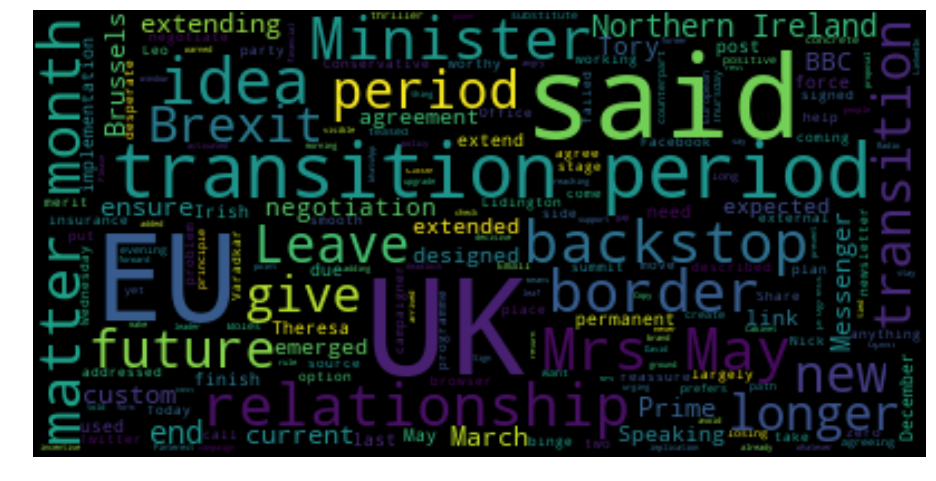

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=60).generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

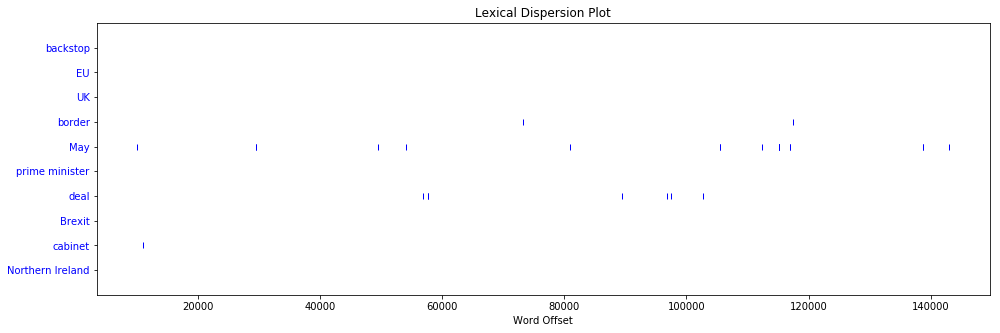

In [27]:
from nltk.book import text4 as content
plt.figure(figsize=(16,5))
topics = ['backstop', 'EU','UK', 'border', 'May', 'prime minister', 'deal', 'Brexit', 'cabinet', 'Northern Ireland']
content.dispersion_plot(topics)

We can observe that 'May' is being discussed throughout the article along with references to border, deal & cabinet. 

### 3. Create Topic Model

In [28]:
tokenized_sents = list(sent_to_words(filtered_sentence))

# Creating the term dictionary of our corpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tokenized_sents)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_sents]

In [29]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Training LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=100)

# Print the model output
print(ldamodel.print_topics(num_topics=2, num_words=20))

[(0, '0.038*"uk" + 0.038*"transition" + 0.031*"eu" + 0.027*"would" + 0.027*"the" + 0.024*"may" + 0.020*"idea" + 0.016*"months" + 0.016*"mrs" + 0.016*"border" + 0.013*"end" + 0.013*"northern" + 0.013*"could" + 0.013*"longer" + 0.009*"messenger" + 0.009*"due" + 0.009*"ensure" + 0.009*"customs" + 0.009*"emerged" + 0.009*"force"'), (1, '0.041*"period" + 0.029*"said" + 0.017*"minister" + 0.017*"relationship" + 0.017*"backstop" + 0.017*"matter" + 0.014*"brexit" + 0.014*"ireland" + 0.014*"leave" + 0.014*"future" + 0.014*"new" + 0.010*"need" + 0.010*"negotiations" + 0.010*"give" + 0.010*"speaking" + 0.010*"theresa" + 0.010*"tory" + 0.010*"march" + 0.010*"permanent" + 0.010*"used"')]


Run the below cell only if need to save the model, else omit this cell and proceed to the next cell.

In [ ]:
'''Save the model'''

from gensim.test.utils import datapath
temp_file = datapath("/home/dsxuser/")
ldamodel.save(temp_file)

'''Load the model'''

ldamodel = LdaModel.load(temp_file)

'''Update the model on new and unseen data'''

ldamodel.update(new_data)

In [30]:
'''Compute Perplexity'''

# a measure of how good the model is. Lower the better.
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

'''Compute Coherence Score'''

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.87741021448

Coherence Score:  0.861216425375


### 4. Visualize the topics from the model

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

In [31]:
'''Visualize the topics'''
# pyLDAvis tool to visualize the fit of our LDA model across topics and their top words. 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
0      51.125919        1       1  0.109507  0.0
1      48.874084        1       2 -0.109507  0.0, topic_info=     Category      Freq          Term     Total  loglift  logprob
term                                                             
103   Default  6.000000        period  6.000000  30.0000  30.0000
26    Default  6.000000    transition  6.000000  29.0000  29.0000
34    Default  6.000000            uk  6.000000  28.0000  28.0000
59    Default  5.000000            eu  5.000000  27.0000  27.0000
168   Default  5.000000          said  5.000000  26.0000  26.0000
97    Default  4.000000           the  4.000000  25.0000  25.0000
122   Default  4.000000         would  4.000000  24.0000  24.0000
72    Default  4.000000           may  4.000000  23.0000  23.0000
9     Default  3.000000          idea  3.000000  22.0000  22.0000
153   Default  3.000000      minister  3.000000  21.0000  21.0000
155   Default  3.000000  relationship  3.000000  20.0000  20.0000
84    Default  3.000000      backstop  3.000000  19.0000  19.0000
194   Default  3.000000        matter  3.000000  18.0000  18.0000
42    Default  3.000000        months  3.000000  17.0000  17.0000
158   Default  3.000000           mrs  3.000000  16.0000  16.0000
143   Default  3.000000        border  3.000000  15.0000  15.0000
64    Default  2.000000        brexit  2.000000  14.0000  14.0000
172   Default  2.000000         leave  2.000000  13.0000  13.0000
165   Default  2.000000       ireland  2.000000  12.0000  12.0000
55    Default  2.000000        future  2.000000  11.0000  11.0000
56    Default  2.000000           new  2.000000  10.0000  10.0000
140   Default  2.000000           end  2.000000   9.0000   9.0000
174   Default  2.000000      northern  2.000000   8.0000   8.0000
23    Default  2.000000        longer  2.000000   7.0000   7.0000
43    Default  2.000000         could  2.000000   6.0000   6.0000
22    Default  1.000000         march  1.000000   5.0000   5.0000
91    Default  1.000000          tory  1.000000   4.0000   4.0000
144   Default  1.000000      expected  1.000000   3.0000   3.0000
120   Default  1.000000        finish  1.000000   2.0000   2.0000
53    Default  1.000000      designed  1.000000   1.0000   1.0000
...       ...       ...           ...       ...      ...      ...
103    Topic2  6.583630        period  6.905816   0.6681  -3.1986
168    Topic2  4.698952          said  5.021201   0.6496  -3.5358
153    Topic2  2.814184      minister  3.136587   0.6075  -4.0485
155    Topic2  2.814184  relationship  3.136587   0.6075  -4.0485
194    Topic2  2.814184        matter  3.136587   0.6075  -4.0485
84     Topic2  2.814184      backstop  3.136587   0.6075  -4.0485
64     Topic2  2.188061        brexit  2.508411   0.5793  -4.3002
165    Topic2  2.185867       ireland  2.508381   0.5783  -4.3012
172    Topic2  2.185867         leave  2.508381   0.5783  -4.3012
55     Topic2  2.185867        future  2.508381   0.5783  -4.3012
56     Topic2  2.185867           new  2.508381   0.5783  -4.3012
99     Topic2  1.557449       theresa  1.880175   0.5276  -4.6401
182    Topic2  1.557449  negotiations  1.880175   0.5276  -4.6401
131    Topic2  1.557449      speaking  1.880175   0.5276  -4.6401
128    Topic2  1.557449          give  1.880175   0.5276  -4.6401
130    Topic2  1.557449          need  1.880175   0.5276  -4.6401
44     Topic2  1.557449           bbc  1.880174   0.5276  -4.6401
150    Topic2  1.557449           but  1.880174   0.5276  -4.6401
91     Topic2  1.557449          tory  1.880175   0.5276  -4.6401
22     Topic2  1.557449         march  1.880175   0.5276  -4.6401
173    Topic2  1.557449      december  1.880175   0.5276  -4.6401
197    Topic2  1.557449          used  1.880175   0.5276  -4.6401
144    Topic2  1.557449      expected  1.880175   0.5276  -4.6401
107    Topic2  1.557448      brussels  1.880174   0.5276  -4.6401

### We have seen how to summarize & visualize a document as well as a news article to get quick information about the data. This methodology can be applied to lot of usecases to extract insights from unstructured data.